# Análise de dados espaciais com o Python

Utilizaremos:

- Geopandas
- netCDF4
- xarray
- rasterio

Aprenderemos a abrir arquivos tipo shapefile, recortar pontos, criar geometrias, abrir rasters e arquivos netCDF. 

## Introdução ao geopandas
O geopandas funciona como o pandas, mas com funcionalidades adicionais que lidam com geometrias. 
Este pacote possibilita plotarmos no espaço, abrir arquivos tipo shapefile, recortar pontos, etc. 
Leiam a documentação em: https://geopandas.org/en/stable/getting_started/introduction.html

In [1]:
import geopandas as gpd

In [2]:
# Leremos um arquivo shapefile utilizando o geopandas

# Caminho para o arquivo que queremos ler
pathShapefile = r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\SC_distritos_CD2022\SC_distritos_CD2022.shp"

# Abro o arquivo com o geopandas
geoData = gpd.read_file(pathShapefile)

# Mostrar as primeiras linhas
geoData.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,4204,Chapecó,420011,Xanxerê,None,None,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI',
       'CD_CONCURB', 'NM_CONCURB', 'geometry'],
      dtype='object')

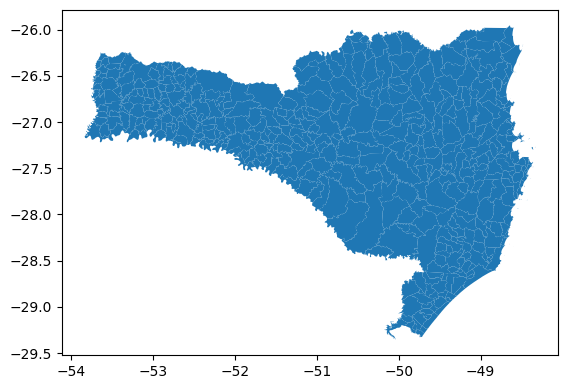

In [4]:
# Plotando o arquivo do geopandas - utilizando o matplotlib

geoData.plot()
geoData.columns

<Axes: >

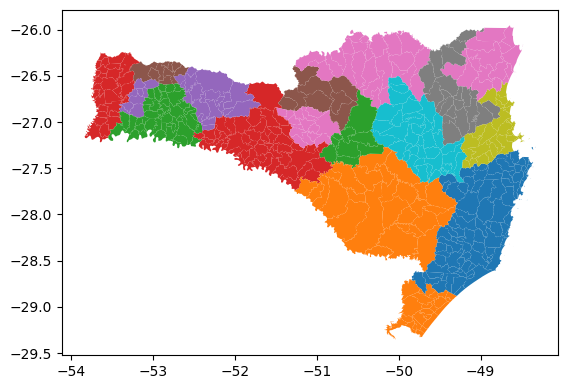

In [5]:
# Plotando com estilo - usar uma coluna do geoData para colorir o mapa

geoData.plot(column='CD_RGI')

<Axes: >

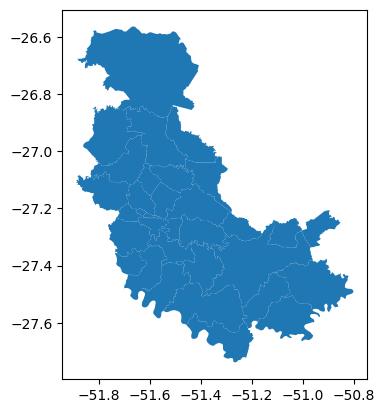

In [7]:
# Selecionar uma região de interesse

# Usando um código de região como exemplo
cod = '420008'

# Plotando a região selecionada
geoData[geoData['CD_RGI']==cod].plot()

## Abrindo arquivos com focos de queimadas no mundo.

Fonte de dados:
https://www2.acom.ucar.edu/modeling/finn-fire-inventory-ncar

Acesso para download:
https://rda.ucar.edu/datasets/d312009/dataaccess/#

Ou arquivo de um único dia:
https://www.acom.ucar.edu/acresp/MODELING/finn_emis_txt/FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt.gz

# Utilizando script para download

import sys, os
from urllib.request import build_opener

opener = build_opener()

filelist = [
  'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz'
]

for file in filelist:
    ofile = os.path.basename(file)
    sys.stdout.write("downloading " + ofile + " ... ")
    sys.stdout.flush()
    infile = opener.open(file)
    outfile = open(ofile, "wb")
    outfile.write(infile.read())
    outfile.close()
    sys.stdout.write("done\n")


In [12]:
# Enquanto isso... 

# Criando um dataframe com pontos e transformando em geodataframe
import pandas as pd
dataSample = pd.DataFrame({'lon':[-48], 'lat':[-27], 'fire':[10]})

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    dataSample, geometry=gpd.points_from_xy(dataSample.lon, dataSample.lat), crs="EPSG:4326"
)

gdf.head()

,lon,lat,fire,geometry
0,-48,-27,10,POINT (-48 -27)


In [17]:
# Plotando o ponto no espaço
# Precisaremos instalar os pacotes branca e folium - pip install branca folium mapclassify matplotlib
#gdf.explore()

In [21]:
# Abrindo arquivo do FINN - queimadas e emissões no mundo no dia 08/07/2024
pathFinn = r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt"

# Abrindo arquivo
finn = pd.read_csv(pathFinn)
print('Este é o número de queimadas nesta data: '+str(finn.shape[0]))
finn.head()

Este é o número de queimadas nesta data: 77396


,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,C3H8,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,16580.0,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,13380.0,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,11320.0,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,10560.0,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,10770.0,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9


In [22]:
# Transformar dataframe do Finn em geodataframe
# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    finn, geometry=gpd.points_from_xy(finn.LONGI, finn.LATI), crs="EPSG:4326"
)

gdf.head()

,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE,geometry
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0,POINT (143.08 68.983)
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0,POINT (143.064 68.998)
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3,POINT (143.082 68.997)
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2,POINT (143.04 68.999)
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9,POINT (140.521 68.879)


<Axes: >

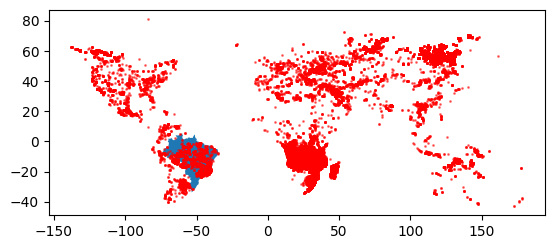

In [31]:
# Verificando focos de calor no mundo e no brasil

# Abrindo shape do brasil
shapeBR = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\BR_Pais_2022\BR_Pais_2022.shp")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
shapeBR.plot(ax=ax)
gdf.plot(ax=ax,color='red',alpha=0.5,markersize=1)


<Axes: >

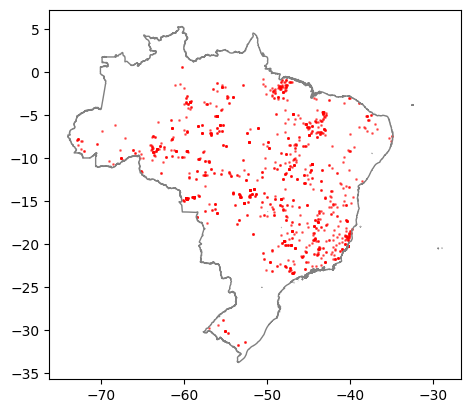

In [38]:
# Recortando dados dentro do Brasil

finnBR = gdf.clip(shapeBR.to_crs('EPSG:4326'))


<Axes: >

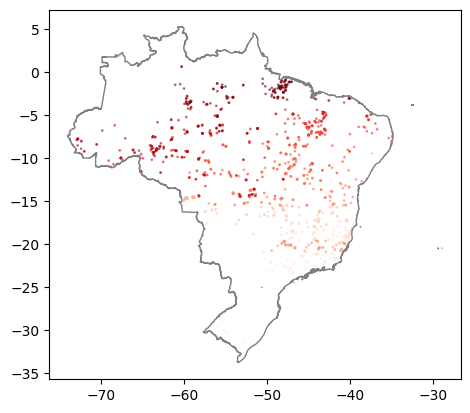

In [45]:
# Plotando
fig, ax = plt.subplots()
shapeBR.boundary.plot(ax=ax, color='gray',linewidth=1)
finnBR.plot(ax=ax,alpha=0.5,markersize=1,c=finnBR.AREA,cmap='Reds')

In [50]:
# Cortando pontos por estado
shapeUF = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\2024\dados\BR_UF_2022\BR_UF_2022.shp")
shapeUF = shapeUF.to_crs('EPSG:4326')
fireInUF = []
for uf in range(0,shapeUF.shape[0]):
    print(shapeUF.iloc[uf,:])
    finnUF = finnBR.clip(shapeUF.geometry[uf])
    fireInUF.append(finnUF)

CD_UF                                                       12
NM_UF                                                     Acre
SIGLA_UF                                                    AC
NM_REGIAO                                                Norte
AREA_KM2                                            164173.429
geometry     POLYGON ((-68.792817347 -10.999569268, -68.793...
Name: 0, dtype: object
CD_UF                                                       13
NM_UF                                                 Amazonas
SIGLA_UF                                                    AM
NM_REGIAO                                                Norte
AREA_KM2                                           1559255.881
geometry     POLYGON ((-56.7629192859999 -3.23220976999994,...
Name: 1, dtype: object
CD_UF                                                       15
NM_UF                                                     Pará
SIGLA_UF                                                    PA
NM_REGIAO

In [52]:
shapeUF.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19..."


In [56]:
# Quantificando focos por estado
dfUF = pd.DataFrame()
dfUF['UF'] = shapeUF.NM_UF
dfUF['fireCount'] = 0
for ii,fire in enumerate(fireInUF):
    print(shapeUF.NM_UF[ii] + ' '+ str(fire.shape[0]))
    dfUF.iloc[ii,1] = fire.shape[0]

dfUF.head()

Acre 23
Amazonas 85
Pará 209
Amapá 0
Tocantins 74
Maranhão 106
Piauí 29
Ceará 13
Rio Grande do Norte 9
Paraíba 4
Pernambuco 3
Alagoas 0
Sergipe 0
Bahia 94
Minas Gerais 187
Espírito Santo 70
Rio de Janeiro 19
São Paulo 54
Paraná 1
Santa Catarina 0
Rio Grande do Sul 17
Mato Grosso do Sul 0
Mato Grosso 304
Goiás 58
Distrito Federal 4
Rondônia 57
Roraima 2


,UF,fireCount
0,Acre,23
1,Amazonas,85
2,Pará,209
3,Amapá,0
4,Tocantins,74


<BarContainer object of 27 artists>

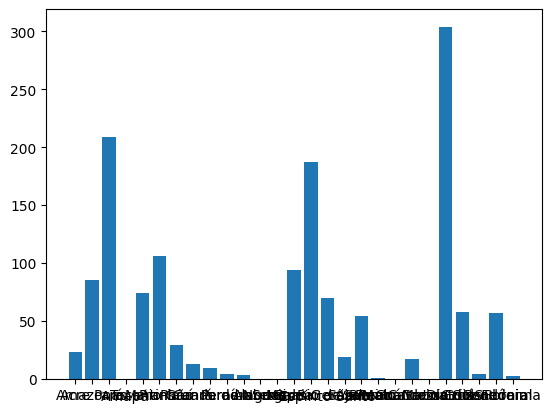

In [58]:
# Plotando dataframe

fig, ax = plt.subplots()
ax.bar(dfUF.UF, dfUF.fireCount)